In [ ]:
import pandas as pd
import plotly.express as px

from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/Assesments/starcraft_player_data.csv"
df = pd.read_csv(path)
df.head()

Mounted at /content/drive


,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [ ]:
df.shape # 3395 rows and 20 columns


(3395, 20)

In [ ]:
df.isnull().any().sum() # No missing values, so no need for missing value handling techniques

0

In [ ]:
df['GameID'].duplicated(keep=False) # No duplicates for games, therefor this is no redundancy

0       False
1       False
2       False
3       False
4       False
        ...  
3390    False
3391    False
3392    False
3393    False
3394    False
Name: GameID, Length: 3395, dtype: bool

In [ ]:
checkTotalZero = df['TotalHours'].isin([0]) # Checking data for any values where the TotalHours is 0 (invalidates the player)
if checkTotalZero.any():
  print("Player without any hours played")
else:
  print("Everyone has played")

Everyone has played


In [ ]:
df.describe()

 # Check for any outliers for the continuous data types as these determine the skill of a player

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [ ]:
df.columns

Index(['GameID', 'LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed'],
      dtype='object')

In [ ]:
df.dtypes 
# Age, HoursPerWeek, and TotalHours cannot be converted so we'll leave them
# out for multicollinearity 

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

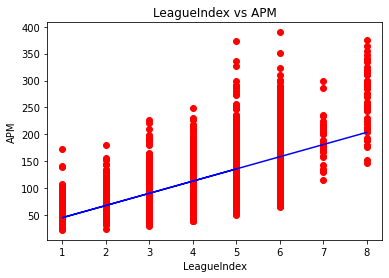

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

X = df[["LeagueIndex"]]
y = df[["APM"]]
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('LeagueIndex vs APM')
plt.xlabel('LeagueIndex')
plt.ylabel('APM')
plt.show()

In [ ]:
fig = px.box(df, y="APM")
fig.show()

In [ ]:
def find_outliers(df):

   q1=df.quantile(0.25) #25th percentile
   q3=df.quantile(0.75) #75th percentile
   iqr=q3-q1 # Range between Q3 and Q1

   outliers = df[((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))] 
   # Using interquartile range  due to the extreme outliers present

   return outliers
  
outliers = find_outliers(df["APM"]) # Can put any column value here; APM used for an example of outliers for this column

print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

# Using IQR is better when there are extreme outliers, as shown in the describe function

number of outliers: 104
max outlier value: 389.8314
min outlier value: 237.219


In [ ]:
def drop_outliers(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   outliers_dropped = not_outliers.dropna().reset_index()

   return outliers_dropped

In [ ]:
gameIDnotIncluded = df.loc[:, df.columns!='GameID'] # The only column where the number does not matter
gameIDnotIncluded.describe
noOutlier_df = drop_outliers(gameIDnotIncluded)
noOutlier_df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



,index,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000
mean,1672.470414,3.895464,100.743719,0.002737,0.000325,4.079882,0.000056,0.000302,0.003335,40.938781,65.623490,4.972339,20.970414,0.000925,6.315089,0.000024,0.000068
std,958.748352,1.368083,34.489242,0.002286,0.000181,2.282152,0.000068,0.000236,0.000811,13.179818,15.507131,1.184888,6.709352,0.000387,1.739818,0.000051,0.000103
min,0.000000,1.000000,30.917400,0.000000,0.000000,0.000000,0.000000,0.000000,0.001184,10.857100,30.958500,2.038900,5.000000,0.000182,2.000000,0.000000,0.000000
25%,845.750000,3.000000,74.399400,0.001071,0.000179,2.000000,0.000000,0.000121,0.002730,31.262625,54.533850,4.090975,16.000000,0.000645,5.000000,0.000000,0.000000
50%,1663.500000,4.000000,96.402000,0.002039,0.000310,4.000000,0.000030,0.000239,0.003285,39.003700,63.938250,4.889500,20.000000,0.000839,6.000000,0.000000,0.000000
75%,2500.250000,5.000000,122.309850,0.003736,0.000448,5.000000,0.000086,0.000427,0.003826,49.215450,75.878675,5.747825,25.000000,0.001134,7.000000,0.000000,0.000105
max,3367.000000,8.000000,229.912200,0.010934,0.000939,10.000000,0.000294,0.001072,0.005894,77.241400,108.492300,8.660900,42.000000,0.002119,12.000000,0.000214,0.000449


In [ ]:
fig = px.box(noOutlier_df, y='GapBetweenPACs')
fig.show()

1. Determine if the dataset needs preprocessing

The data did not preprocessing as there were many outliers in the data for every category. The way I discovered these outliers was using a box plot graph on multiple columns to initially find which data points were not considered within range of the majority of the data. Afterwards, I found out the using the quartile range was a good way of detecting the outliers. In fact, I came with around 1367 outliers using the IQR methodology I followed to get rid of extreme outliers. 

In [ ]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

noOutlier_df = noOutlier_df[~noOutlier_df.isin([np.nan, np.inf, -np.inf]).any(1)]
x_variables = noOutlier_df[['LeagueIndex','APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed']]

In [ ]:
corr=noOutlier_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,index,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
index,1.000000,0.036336,0.068041,0.063972,0.055103,0.093803,0.020613,0.028241,0.039628,-0.068087,-0.039650,0.038071,0.024740,-0.004181,0.062313,0.011053,-0.030519
LeagueIndex,0.036336,1.000000,0.565854,0.448894,0.382387,0.255495,0.259812,0.170948,0.520111,-0.449739,-0.598192,0.131015,0.161548,0.288946,0.072294,0.102191,0.149297
APM,0.068041,0.565854,1.000000,0.752128,0.446272,0.273852,0.160634,0.289919,0.670901,-0.593268,-0.790861,0.489542,0.239798,0.444467,0.101267,0.120127,0.037744
SelectByHotkeys,0.063972,0.448894,0.752128,1.000000,0.514464,0.279241,0.101680,0.107940,0.459347,-0.317565,-0.487947,0.172499,0.135999,0.281589,0.035058,0.098467,0.076010
AssignToHotkeys,0.055103,0.382387,0.446272,0.514464,1.000000,0.351190,0.140616,0.110557,0.366706,-0.294558,-0.376488,0.065552,0.128980,0.180263,0.101534,0.145214,0.196676
UniqueHotkeys,0.093803,0.255495,0.273852,0.279241,0.351190,1.000000,0.107536,0.070566,0.300310,-0.174088,-0.241300,-0.025045,0.234714,0.098774,0.216315,0.129870,0.057374
MinimapAttacks,0.020613,0.259812,0.160634,0.101680,0.140616,0.107536,1.000000,0.177336,0.099069,-0.180731,-0.124640,0.103831,0.134761,0.074405,0.055173,0.038841,0.004744
MinimapRightClicks,0.028241,0.170948,0.289919,0.107940,0.110557,0.070566,0.177336,1.000000,0.108779,-0.190467,-0.189305,0.296351,0.146647,0.230065,0.149308,0.093397,0.043957
NumberOfPACs,0.039628,0.520111,0.670901,0.459347,0.366706,0.300310,0.099069,0.108779,1.000000,-0.428464,-0.821693,-0.220608,0.438834,0.273837,0.260801,0.145939,0.109284
GapBetweenPACs,-0.068087,-0.449739,-0.593268,-0.317565,-0.294558,-0.174088,-0.180731,-0.190467,-0.428464,1.000000,0.594916,-0.363473,-0.017487,-0.188224,-0.023642,-0.022567,-0.049034


In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = x_variables.columns
vif_data["VIF"] = [variance_inflation_factor(x_variables.values, i) for i in range(len(x_variables.columns))]

vif_data

,feature,VIF
0,LeagueIndex,16.156645
1,APM,293.553069
2,SelectByHotkeys,15.305855
3,AssignToHotkeys,6.604473
4,UniqueHotkeys,5.253083
5,MinimapAttacks,1.913564
6,MinimapRightClicks,3.197127
7,NumberOfPACs,118.972171
8,GapBetweenPACs,19.657925
9,ActionLatency,56.239066


In order to calculate multicollinearity, we have check the VIF, which is essentially how correlated a predictor is with other predictors. The higher the VIF score, the more standard error is inflated and the less statistically significant other values are. Anything with a VIF > 10 is an indicator of multicollinearity, but the main point is to reduce the variables so that you get rid of redundancy. 

In [ ]:
x_variables_new = noOutlier_df[['LeagueIndex','APM','MinimapAttacks','GapBetweenPACs',
       'MinimapRightClicks',
       'ComplexUnitsMade']]

vif_data = pd.DataFrame()
vif_data["feature"] = x_variables_new.columns
vif_data["VIF"] = [variance_inflation_factor(x_variables_new.values, i) for i in range(len(x_variables_new.columns))]

vif_data
       

,feature,VIF
0,LeagueIndex,12.822669
1,APM,12.572955
2,MinimapAttacks,1.849384
3,GapBetweenPACs,3.837548
4,MinimapRightClicks,2.924240
5,ComplexUnitsMade,1.243731


In [ ]:
corr=x_variables_new.corr()
corr.style.background_gradient(cmap='coolwarm')

,LeagueIndex,APM,MinimapAttacks,GapBetweenPACs,MinimapRightClicks,ComplexUnitsMade
LeagueIndex,1.000000,0.565854,0.259812,-0.449739,0.170948,0.102191
APM,0.565854,1.000000,0.160634,-0.593268,0.289919,0.120127
MinimapAttacks,0.259812,0.160634,1.000000,-0.180731,0.177336,0.038841
GapBetweenPACs,-0.449739,-0.593268,-0.180731,1.000000,-0.190467,-0.022567
MinimapRightClicks,0.170948,0.289919,0.177336,-0.190467,1.000000,0.093397
ComplexUnitsMade,0.102191,0.120127,0.038841,-0.022567,0.093397,1.000000


2. Multicollinearity has a negative impact on many popular ML models. Check if this dataset
experiences any multicollinearity. If so, reduce the impact until an acceptable point.

Due to the high multicollinearity, I reduced it so the correlation between variables was at an acceptable point. The method I chose in selecting these variables was based on how much correlation it had with each variable and the amount of variables it was correlated with. 


(Case 1) One example of a case where I deleted the variable is when they had too much correlation with multiple variables. An example of this was NumberOfPACs. While it had a high correlation with LeagueIndex, it was also essentially overlapping in correlation with APM. 

(Case 2) If there were variables that were highly correlated with case 1, they were removed as they were seen as variables that were correlated with a redundant variable. Think of like a tree with bad fruits related to each other.

(Case 3) If a variable had high correlation with one variable, but none of the others, I removed it because this implies that the two variables are the same (ie: ActionLatency and GapBetweenPacs). In one instance, I chose GapBetweenPacs over ActionLatency as it had a higher negative correlation (slightly) with LeagueIndex (the dependent variable of this dataset). Meaning, the more highly correlated, whether positive/negative a variable is, the higher impact it has on the ranking of a player

I wanted to ensure that the VIF of LeagueIndex was greater than any of the VIF scores of the other variables as it should have the most correlation of the variables being it is the dependent variable. Otherwise, if the independent variable is more correlated with other independent variables (higher VIF), this means there is more redundancy within the variables. 



3. Determine what are the most important features that could help predict a player’s rank?
Interpret your results for a general audience (coaching staff, pro players, etc). So after taking out the variables with redundancy, I have come to the conclusion that based on the colormap, these are the most important features that could predict a player's rank are APM and GAPBetweenPACs. The reason being is that these are the two features with the highest correlation for a player's skill/rank. The higher APM a player has, the more likely they are to be cracked and compete at a higher level. The smaller the gaps are between Perception Action Cycles (PACs), the more likely they are to be higher ranked as well. They both have significant weight in their correlation in a player's skill!

In [ ]:
def RisingPlayer(df):
   lower_gap = df["GapBetweenPACs"].quantile(q=0.10, interpolation = 'lower')
   league_index = df["LeagueIndex"].quantile(q=.90, interpolation= 'higher')
   apm = df["LeagueIndex"].quantile(q=.90, interpolation= 'higher')

   not_outliers = df[(df["GapBetweenPACs"] <= lower_gap) & (df["LeagueIndex"] > league_index) & (df["APM"] > apm)]

   outliers_dropped = not_outliers.dropna().reset_index()

   return outliers_dropped

most_important_df = noOutlier_df[['LeagueIndex','APM','GapBetweenPACs']]
rp = RisingPlayer(most_important_df)
rp


,index,LeagueIndex,APM,GapBetweenPACs
0,183,7,182.6208,24.4969
1,215,7,130.8600,18.7416
2,653,7,157.6344,22.4855
3,1716,7,159.2238,17.9333
4,2027,8,190.2396,17.9901


4. Your team’s Starcraft2 coaching staff loved your project! They think this is perfect for
scouting rising stars. Using your discoveries from (3), create a function to find players
who should be given a chance to become professionals. Explain why your set of players
make sense.

My set of players would be great players considering that they are of the above the 95th percentile for each respective category that I felt had the most value. So for players that I would put my eyes on as rising stars, I would consider the players from index 0 - 3 as the last one is already a pro considering that they are in the top percentile of all players in LeagueIndex, APM, and GapBetweenPACs. Many of the Pros have higher APMs has shown below where I compare the whole dataset against my RisingStars function. The difference is that those players are considered outliers, which they should be, since they are already at the professional level. I could put a max bound on the rank so  that I could look at the whole dataset, but we eliminated outliers based on their low/high outlier data. I wanted to summarize the player's skills by focusing on their APM and GapBetweenPACs. I also added weight to LeagueIndex as I understand that is important to still be highly ranked and is correlated with the others considering it takes a lot of dedication to get to the higher ranks. Overall, I learned that through correlation, you can decipher a lot of information to quantify a player's abilities.

In [ ]:
most_important_df = df[['LeagueIndex','APM','GapBetweenPACs']]
rp = RisingPlayer(most_important_df)
rp

,index,LeagueIndex,APM,GapBetweenPACs
0,104,7,286.4538,20.4232
1,119,7,216.6852,21.6119
2,368,7,130.8600,18.7416
3,500,7,202.0026,20.0964
4,687,7,172.3362,18.0054
...,...,...,...,...
57,3390,8,259.6296,18.6059
58,3391,8,314.6700,14.3023
59,3392,8,299.4282,12.4028
60,3393,8,375.8664,11.6910


5. Hypothetically, if you were to move forward with creating a fully-fledged model to predict
LeagueIndex, what model(s) would you consider and why? (Don’t actually implement
anything!)

First we would split the dataset into a training and test set, and then we could consider multiple different models.

Hypothetically, if I were to create a fully-fledged model to predict LeagueIndex, I would use supervised learning, specifically logistic regression. I would use a logistic regression model to predict a binary outcome of whether or not a player will make it to the Professional level or not based on the predictor variables. It's clearly the best model for modeling the probability of an event taking place by having the log-odds of the event be a linear combination of the multiple indepdent variables we had. And we would be able to create a correlation of the probability of someone becoming a pro based on one or more variables and see which feature matters the most when determining a prospect. We can create percentages and data points of the probability that can give us great indicators of a player's capabilties, especially if the goodness of fit ofr the model fits our observations

We could also use linear regression as it would be a great way to pinpoint a specific target.

If we want to figure out more about what pros tend to have that we should look for in prospects, we could go the route of unsupervised and use kmeans clustering or another algorithm to figure out what patterns we can detect in pros.